In [3]:
# Tweepy - Python library for accessing the Twitter API.
import tweepy

# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Pandas - Data manipulation and analysis library
import pandas as pd

# NumPy - mathematical functions on multi-dimensional arrays and matrices
import numpy as np

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

# conda install tweepy
# conda install textblob
# conda install wordcloud

In [4]:
consumer_key = ""
consumer_secret = ""
access_token_key = ""
access_token_secret = ""

In [3]:
# authenticate Tweepy
authentication = tw.OAuthHandler(consumer_key, consumer_secret)
authentication.set_access_token(access_token_key, access_token_secret)
api = tw.API(authentication)

In [4]:
df = pd.read_csv("/Users/ilmasheriff/Downloads/combined_data_gather_twitter_Oct_30.csv",encoding= 'unicode_escape')

In [5]:
df.shape

(1010508, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010508 entries, 0 to 1010507
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Timestamp  1010508 non-null  object 
 1   Data       1010508 non-null  object 
 2   Polarity   1010508 non-null  float64
 3   Sentiment  1010508 non-null  object 
dtypes: float64(1), object(3)
memory usage: 30.8+ MB


In [13]:
df = pd.read_csv("/Users/ilmasheriff/tweetdata",encoding= 'unicode_escape').head(80000)

In [14]:
df = df.drop(df[df['Data'] == ''].index)

In [15]:
def getTextAnalysis(a):
    if a > 0:
        return "1"
    else:
        return "0"

In [16]:
df['Score'] = df['Polarity'].apply(getTextAnalysis)

In [9]:
df[df['Score'] == '1'].shape

(40006, 5)

In [10]:
df[df['Score'] == '0'].shape

(39994, 5)

In [17]:
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.4)


In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
import string

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
train_pos = train[ train['Score'] == '1']
train_pos = train_pos['Data']
train_neg = train[ train['Score'] == '0']
train_neg = train_neg['Data']

Positive words


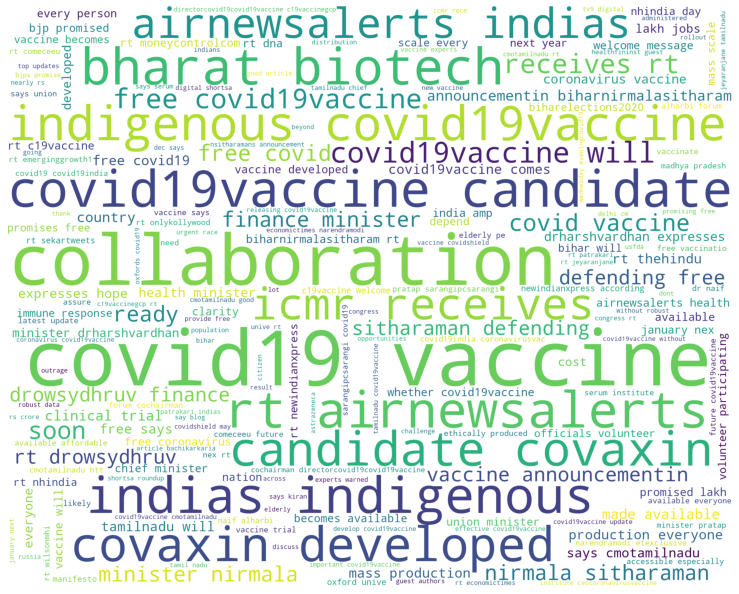

Negative words


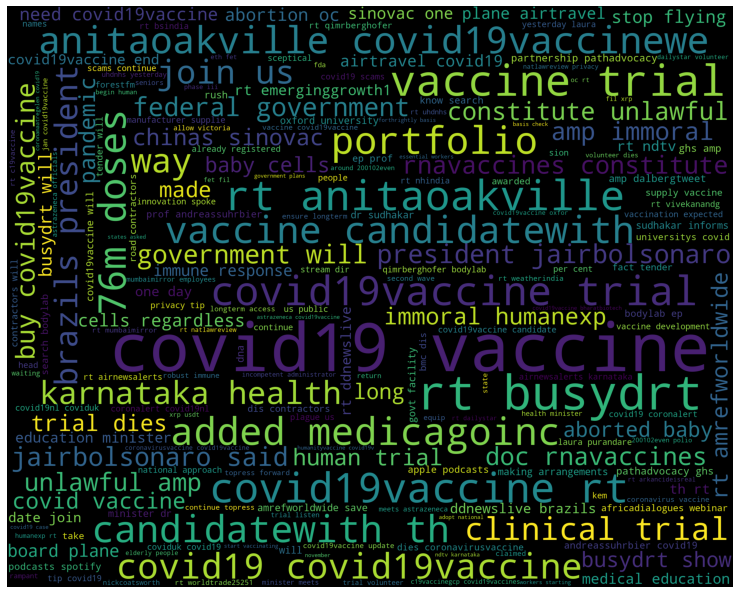

In [19]:
def wordcloud_draw(data, color = 'black'):
    data = data.str.lower()
    all_data= data.str.split(' ')
    all_cleaned = []

    for text in all_data:
        text = [x.strip(string.punctuation) for x in text]
        all_cleaned.append(text)
        
    text_data = [" ".join(text) for text in all_cleaned]
    words= " ".join(text_data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [20]:
tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Data.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_cleaned,row.Score))

test_pos = test[ test['Score'] == '1']
test_pos = test_pos['Data']
test_neg = test[ test['Score'] == '0']
test_neg = test_neg['Data']

In [21]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['containts(%s)' % word] = (word in document_words)
    return features

In [22]:
w_features

dict_keys(['information', 'misinformation', 'about', 'covid19vaccine', 'how', 'face', 'infodemic', 'via', 'unicef', 'amrefworldwide', 'save', 'the', 'date', 'join', 'partnership', 'pathadvocacy', 'ghs', 'amp', 'dalbergtweet', 'during', 'africadialogues', 'dhtoons', 'sajithkumar', 'read', 'more', 'biharelections', 'drowsydhruv', 'finance', 'minister', 'nirmala', 'sitharaman', 'defending', 'free', 'covid', 'vaccine', 'announcementin', 'biharnirmalasitharam', 'hunt', 'for', 'viable', 'government', 'has', 'given', 'approval', 'humanchallenge', 'trial', 'that', 'odishas', 'sum', 'hospital', 'soon', 'begin', 'phase', 'human', 'covaxin', 'bharatbiotech', 'received', 'regulatory', 'carry', 'out', 'phase3', 'clinical', 'its', 'whic', 'karnataka', 'health', 'and', 'medical', 'education', 'sudhakar', 'informs', 'state', 'making', 'arrangements', 'c19vaccine', 'kaimrcksa', 'cepivaccines', 'ksamedresearch', 'mriglobalnews', 'kelloggox', 'zoomus', 'alaskar98', 'deeptechvc', 'airnewsalerts', 'indias'

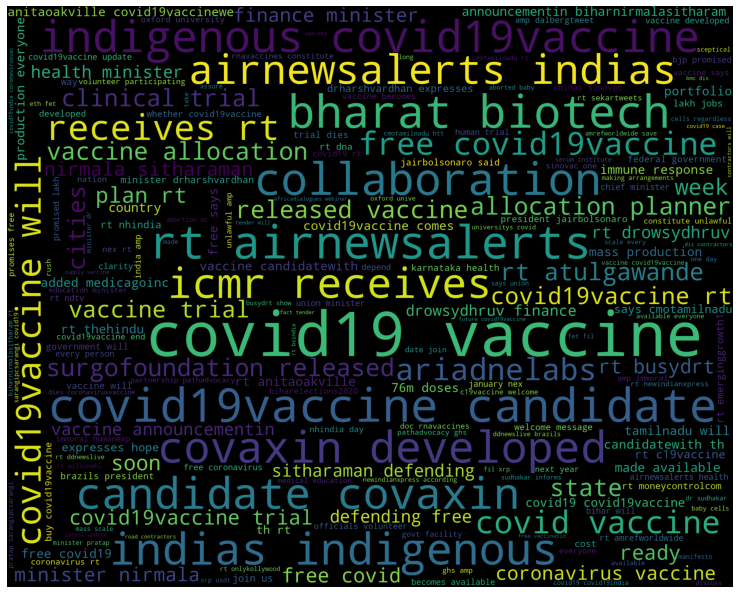

In [75]:
wordcloud_draw(w_features)

In [23]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [24]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '0'): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == '1'): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 16073/15926 
[Positive]: 15927/14381 


In [25]:
positive = df[df['Score'] == '1']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

50.00750000000001 % of positive tweets


In [26]:
positive = df[df['Score'] == '0']

print(str(positive.shape[0]/(df.shape[0])*100) + " % of positive tweets")

49.9925 % of positive tweets


<BarContainer object of 2 artists>

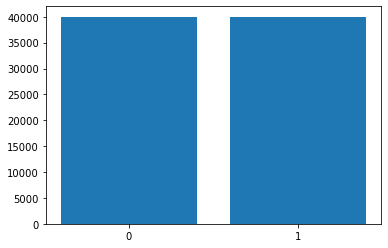

In [27]:
labels = df.groupby('Score').count().index.values

values = df.groupby('Score').size().values

plt.bar(labels, values)

In [32]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

form_sentence(df['Data'].iloc[50000])


'RT dailystar Volunteer in Oxford Universitys Covid vaccine trial dies CoronavirusVaccine Covid19Vaccine Oxfor'

In [33]:
from nltk.corpus import stopwords
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
(no_user_alpha(form_sentence(df['Data'].iloc[50000])))


['RT',
 'dailystar',
 'Volunteer',
 'Oxford',
 'Universitys',
 'Covid',
 'vaccine',
 'trial',
 'dies',
 'CoronavirusVaccine',
 'Oxfor']

In [42]:
from nltk.stem.wordnet import WordNetLemmatizer
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
(normalization(df['Data']))

['cnsnews benshapiro Can COVID19Vaccine end the pandemic',
 'IntrepidWarrior realDonaldTrump Can COVID19Vaccine end the pandemic',
 'edyong209 HelenBranswell Can COVID19Vaccine end the pandemic',
 'AdamTexDavis Can COVID19Vaccine end the pandemic',
 'HegKong Can COVID19Vaccine end the pandemic',
 'DrTessaT HegKong Can COVID19Vaccine end the pandemic',
 'FarahKhanAli Can COVID19Vaccine end the pandemic',
 'putaYINGonit CMSGov Can COVID19Vaccine end the pandemic',
 'C19Vaccine kaimrcksa CEPIvaccines KSAMedResearch MRIGlobalNews KelloggOx zoomus Alaskar98 DeepTechVC',
 'Moderna Prepares to Launch COVID19 Vaccine CandidateBiopharmaceutical CoronaVirus CoronavirusTreatment',
 'RT iansindia Russian President VladimirPutin said on Thursday that Russia is ready to produce COVID19 vaccines at the sites of foreig',
 'RT SurgoFoundation Indepth story on the need for govts to plan ahead for distribution once a COVID19vaccine is available We cant rep',
 'RT ndtv BJP Manifesto For Madhya Pradesh Byp

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [18]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(upsampled['Data'], upsampled['Score'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)


In [19]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           1       0.99      1.00      1.00     66915
           2       1.00      0.99      1.00     68150

    accuracy                           1.00    135065
   macro avg       1.00      1.00      1.00    135065
weighted avg       1.00      1.00      1.00    135065

[[66914     1]
 [  608 67542]]
0.9954910598600674


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(df['Data']).toarray()

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, df['Score'], test_size=0.2, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [37]:
predictions = text_classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[7871    0]
 [   0 8129]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7871
           1       1.00      1.00      1.00      8129

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

1.0


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Separate input features and target
y = df.Score
X = df.Data



# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)




# separate minority and majority classes
pos= X[X.Score=='1']
neg= X[X.Score=='0']

# upsample minority
upsampled = resample(neg,
                          replace=True, # sample with replacement
                          n_samples=len(pos), # match number in majority class
                          random_state=27) # reproducible results


# combine majority and upsampled minority
up_sampled = pd.concat([neg, upsampled])

# check new class counts
up_sampled.Data

21732               COVID19vaccine For Whom The Bell Tolls
59309    It may be time to reset expectations on when w...
67815    drreddys Laboratories working on testing a COV...
33451    RT AnitaOakville As we equip in response to th...
6042     FedEx will start to use SenseAware ID in antic...
                               ...                        
55112    Indian government estimates Rs 45000 to Rs 500...
51734    RT weatherindia Sanofi GlaxoSmithKline to Help...
22401    PotusTrump announced OPERATION WARP SPEED for ...
36755    RT JuliaBfitness RayArmat RobertKennedyJr foun...
67292    BharatBiotech got the approval last week from ...
Name: Data, Length: 60000, dtype: object

In [41]:
up_sampled

,Data,Score
21732,COVID19vaccine For Whom The Bell Tolls,0
59309,It may be time to reset expectations on when w...,0
67815,drreddys Laboratories working on testing a COV...,0
33451,RT AnitaOakville As we equip in response to th...,0
6042,FedEx will start to use SenseAware ID in antic...,0
...,...,...
55112,Indian government estimates Rs 45000 to Rs 500...,0
51734,RT weatherindia Sanofi GlaxoSmithKline to Help...,0
22401,PotusTrump announced OPERATION WARP SPEED for ...,0
36755,RT JuliaBfitness RayArmat RobertKennedyJr foun...,0


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(up_sampled['Data']).toarray()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, up_sampled['Score'], test_size=0.2, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [46]:
predictions = text_classifier.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[12000]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12000

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

1.0
